In [1]:
import cv2
import openslide
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

import sys
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / 'scripts'))

from display_annot import draw_wsi, draw_roi, draw_patch
from comparison_util import draw_predictions
plt.rcParams['axes.grid'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

(785, 1589, 3)


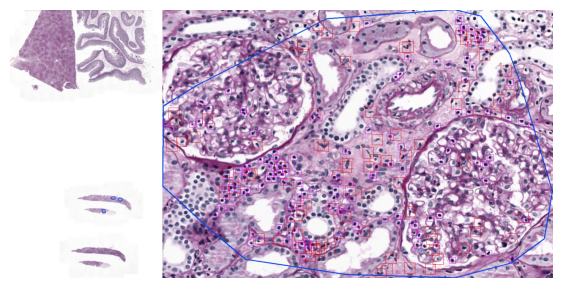

In [2]:
wsi_path = Path('../data/raw/images/pas-cpg/A_P000030_PAS_CPG.tif')
wsi = draw_wsi(wsi_path, 7)
wsi = cv2.cvtColor(wsi, cv2.COLOR_BGR2RGB)

wsi_name = '_'.join(wsi_path.name.split('_')[:2])
with open(wsi_path.parents[2] / 'annotations/json_pixel' / (wsi_name + '_inflammatory-cells.json')) as f:
    annot = json.load(f)
roi = draw_roi(wsi_path, annot['rois'][1], 1)
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

scaling = roi.shape[0] / wsi.shape[0]
wsi = cv2.resize(wsi, dsize=None, fx=scaling, fy=scaling, interpolation=cv2.INTER_AREA)
image = np.hstack([wsi, roi])
print(image.shape)

plt.figure(figsize=(7, 4))
plt.imshow(image)
plt.axis('off')
# plt.imsave('sample_wsi.png', image)
plt.show()

(735, 710, 3)


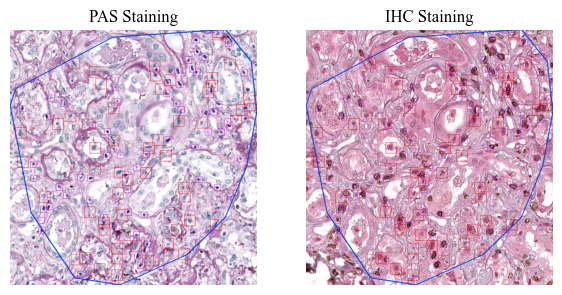

In [3]:
pas_path = Path('../data/raw/images/pas-cpg/A_P000007_PAS_CPG.tif')
ihc_path = Path('../data/raw/images/ihc/A_P000007_IHC_CPG.tif')
wsi_name = '_'.join(pas_path.name.split('_')[:2])
with open(pas_path.parents[2] / 'annotations/json_pixel' / (wsi_name + '_inflammatory-cells.json')) as f:
    annot = json.load(f)

pas = draw_roi(pas_path, annot['rois'][0], 1)
pas = cv2.cvtColor(pas, cv2.COLOR_BGR2RGB)
ihc = draw_roi(ihc_path, annot['rois'][0], 1)
ihc = cv2.cvtColor(ihc, cv2.COLOR_BGR2RGB)
print(pas.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))
ax1.imshow(pas)
ax1.set_title('PAS Staining')
ax1.axis('off')
ax2.imshow(ihc)
ax2.set_title('IHC Staining')
ax2.axis('off')
# fig.savefig('staining.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
patch1 = draw_patch(Path('../data/basic_box/pas-cpg256/images/A_P000032_PAS_CPG_ROI0_152.png'), draw_annot=False)
patch1 = cv2.cvtColor(patch1, cv2.COLOR_BGR2RGB)
patch2 = draw_patch(Path('../data/pure_seg_box/pas-cpg256/images/A_P000032_PAS_CPG_ROI0_152.png'), draw_annot=False)
patch2 = cv2.cvtColor(patch2, cv2.COLOR_BGR2RGB)
patch3 = draw_patch(Path('../data/basic_box/pas-cpg256/images/A_P000011_PAS_CPG_ROI0_16.png'), draw_annot=False)
patch3 = cv2.cvtColor(patch3, cv2.COLOR_BGR2RGB)
patch4 = draw_patch(Path('../data/pure_seg_box/pas-cpg256/images/A_P000011_PAS_CPG_ROI0_16.png'), draw_annot=False)
patch4 = cv2.cvtColor(patch4, cv2.COLOR_BGR2RGB)

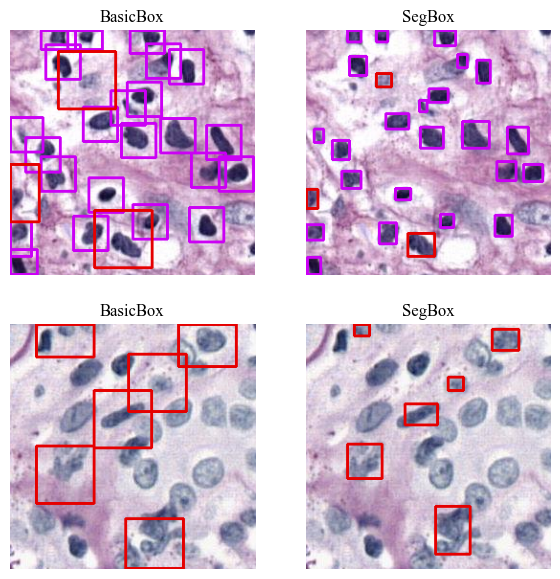

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

ax[0, 0].imshow(patch1)
ax[0, 0].set_title('BasicBox')
ax[0, 0].axis('off')
ax[0, 1].imshow(patch2)
ax[0, 1].set_title('SegBox')
ax[0, 1].axis('off')
ax[1, 0].imshow(patch3)
ax[1, 0].set_title('BasicBox')
ax[1, 0].axis('off')
ax[1, 1].imshow(patch4)
ax[1, 1].set_title('SegBox')
ax[1, 1].axis('off')

# fig.savefig('boxes_comparison.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
patch1 = draw_patch(Path('../data/basic_box/pas-cpg256/images/A_P000031_PAS_CPG_ROI0_20.png'), draw_annot=False)
patch1 = cv2.cvtColor(patch1, cv2.COLOR_BGR2RGB)
patch2 = draw_patch(Path('../data/pure_seg_box/pas-cpg256_pad10/images/A_P000031_PAS_CPG_ROI0_20.png'), draw_annot=False)
patch2 = cv2.cvtColor(patch2, cv2.COLOR_BGR2RGB)

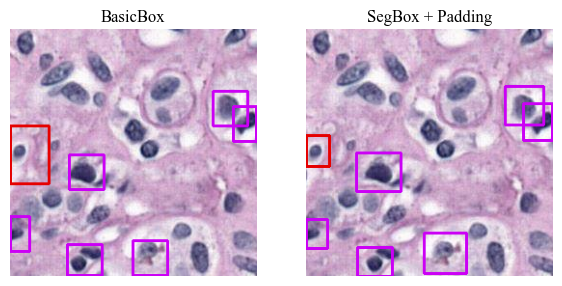

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

ax[0].imshow(patch1)
ax[0].set_title('BasicBox')
ax[0].axis('off')
ax[1].imshow(patch2)
ax[1].set_title('SegBox + Padding')
ax[1].axis('off')

# fig.savefig('padding.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

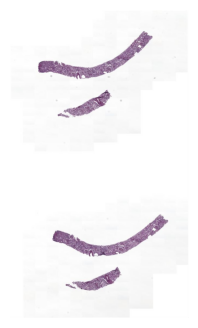

In [8]:
wsi = draw_wsi(Path('../data/raw/images/pas-cpg/D_P000013_PAS_CPG.tif'), level=7)
slide = openslide.OpenSlide(Path('../data/raw/images/pas-cpg/D_P000013_PAS_CPG.tif'))
image = slide.read_region((0, 0), 6, slide.level_dimensions[6])

plt.figure(figsize=(7, 4))
plt.imshow(image)
plt.axis('off')
# image.save('wsi.png')
plt.show()


image 1/1 C:\Adata\FIT CVUT\5-2\DIP\monkey_challenge\notebooks\..\data\basic_box\pas-cpg256\images\D_P000013_PAS_CPG_ROI0_13.png: 256x256 3 lymphocytes, 3 monocytes, 250.5ms
Speed: 0.9ms preprocess, 250.5ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)


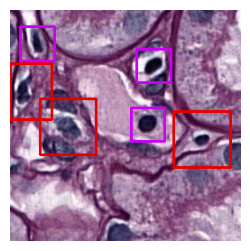

In [9]:
patch_path = Path('../data/basic_box/pas-cpg256/images/D_P000013_PAS_CPG_ROI0_13.png')
model = YOLO('../yolo/basic_box/img256_ep100_yolo11m/weights/last.pt')
results = model.predict(patch_path, imgsz=256, conf=0.25, max_det=None, agnostic_nms=True, iou=0.7)
image = draw_predictions(patch_path, results[0])
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(7, 3))
plt.imshow(image)
plt.axis('off')
# plt.imsave('pred_patch.png', image)
plt.show()